# Unemployment in India - Data Analysis


**Dataset**: Unemployment in India (Monthly Data)
**Source**: Government statistics
**Analysis Date**: January 2025

## 1. Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("Libraries imported successfully! 📚")

Libraries imported successfully! 📚


## 2. Load and Explore the Dataset

In [2]:
# Load the dataset
url = "https://hebbkx1anhila5yf.public.blob.vercel-storage.com/Unemployment%20in%20India%20%281%29-7lyYduOC6hgdA9vC9XAuybaRDF6xdH.csv"

try:
    df = pd.read_csv(url)
    print(f"✅ Data loaded successfully!")
    print(f"Dataset shape: {df.shape}")
except Exception as e:
    print(f"❌ Error loading data: {e}")

✅ Data loaded successfully!
Dataset shape: (768, 7)


In [3]:
# Display basic information about the dataset
print("First 5 rows:")
df.head()

First 5 rows:


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [4]:
# Dataset information
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [5]:
# Clean column names (remove extra spaces)
df.columns = df.columns.str.strip()

# Clean the Date column by removing leading/trailing spaces
df['Date'] = df['Date'].str.strip()

# Convert date column to datetime with error handling
try:
    df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
    print("✅ Date conversion successful!")
except ValueError as e:
    print(f"❌ Date conversion error: {e}")
    print("Trying alternative date parsing...")
    # Try with mixed format parsing
    df['Date'] = pd.to_datetime(df['Date'], format='mixed', dayfirst=True)
    print("✅ Date conversion successful with mixed format!")

# Convert numeric columns
numeric_columns = ['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']

for col in numeric_columns:
    # Clean the column by removing spaces and converting to numeric
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip()
        df[col] = pd.to_numeric(df[col], errors='coerce')
    else:
        print(f"Warning: Column '{col}' not found in dataset")

print("Data types after conversion:")
print(df.dtypes)

✅ Date conversion successful!
Data types after conversion:
Region                                             object
Date                                       datetime64[ns]
Frequency                                          object
Estimated Unemployment Rate (%)                   float64
Estimated Employed                                float64
Estimated Labour Participation Rate (%)           float64
Area                                               object
dtype: object


In [6]:
# Check for missing values
print("Missing Values:")
df.isnull().sum()

Missing Values:


Region                                     28
Date                                       28
Frequency                                  28
Estimated Unemployment Rate (%)            28
Estimated Employed                         28
Estimated Labour Participation Rate (%)    28
Area                                       28
dtype: int64

In [7]:
# Basic statistics
df.describe()

,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740,740.000000,7.400000e+02,740.000000
mean,2019-12-12 18:36:58.378378496,11.787946,7.204460e+06,42.630122
min,2019-05-31 00:00:00,0.000000,4.942000e+04,13.330000
25%,2019-08-31 00:00:00,4.657500,1.190404e+06,38.062500
50%,2019-11-30 00:00:00,8.350000,4.744178e+06,41.160000
75%,2020-03-31 00:00:00,15.887500,1.127549e+07,45.505000
max,2020-06-30 00:00:00,76.740000,4.577751e+07,72.570000
std,NaN,10.721298,8.087988e+06,8.111094


## 3. Data Cleaning and Preprocessing

In [8]:
# Check for missing values after conversion and clean
print("Missing values after cleaning:")
print(df.isnull().sum())

# Remove any rows with missing critical data
df_clean = df.dropna()
print(f"\nRows after cleaning: {len(df_clean)}")

# Extract additional time features
df_clean['Year'] = df_clean['Date'].dt.year
df_clean['Month'] = df_clean['Date'].dt.month
df_clean['Month_Name'] = df_clean['Date'].dt.month_name()

print("\nAdditional time features added successfully!")

Missing values after cleaning:
Region                                     28
Date                                       28
Frequency                                  28
Estimated Unemployment Rate (%)            28
Estimated Employed                         28
Estimated Labour Participation Rate (%)    28
Area                                       28
dtype: int64

Rows after cleaning: 740

Additional time features added successfully!


## 4. Exploratory Data Analysis

In [9]:
# Unique values in categorical columns
print("Unique values in categorical columns:")
print(f"Regions: {df_clean['Region'].nunique()}")
print(f"Areas: {df_clean['Area'].unique()}")
print(f"Frequency: {df_clean['Frequency'].unique()}")
print(f"Date range: {df_clean['Date'].min()} to {df_clean['Date'].max()}")

print("\nRegions in the dataset:")
regions = df_clean['Region'].unique()
for i, region in enumerate(sorted(regions), 1):
    print(f"{i}. {region}")

Unique values in categorical columns:
Regions: 28
Areas: ['Rural' 'Urban']
Frequency: [' Monthly' 'Monthly']
Date range: 2019-05-31 00:00:00 to 2020-06-30 00:00:00

Regions in the dataset:
1. Andhra Pradesh
2. Assam
3. Bihar
4. Chandigarh
5. Chhattisgarh
6. Delhi
7. Goa
8. Gujarat
9. Haryana
10. Himachal Pradesh
11. Jammu & Kashmir
12. Jharkhand
13. Karnataka
14. Kerala
15. Madhya Pradesh
16. Maharashtra
17. Meghalaya
18. Odisha
19. Puducherry
20. Punjab
21. Rajasthan
22. Sikkim
23. Tamil Nadu
24. Telangana
25. Tripura
26. Uttar Pradesh
27. Uttarakhand
28. West Bengal


## 5. Statistical Summary

In [10]:
# Overall statistics
print("Overall Statistics:")
print(f"Average Unemployment Rate: {df_clean['Estimated Unemployment Rate (%)'].mean():.2f}%")
print(f"Highest Unemployment Rate: {df_clean['Estimated Unemployment Rate (%)'].max():.2f}%")
print(f"Lowest Unemployment Rate: {df_clean['Estimated Unemployment Rate (%)'].min():.2f}%")
print(f"Average Labour Participation Rate: {df_clean['Estimated Labour Participation Rate (%)'].mean():.2f}%")

Overall Statistics:
Average Unemployment Rate: 11.79%
Highest Unemployment Rate: 76.74%
Lowest Unemployment Rate: 0.00%
Average Labour Participation Rate: 42.63%


In [11]:
# Regional analysis
regional_unemployment = df_clean.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False)

print("Top 10 Regions by Average Unemployment Rate:")
print(regional_unemployment.head(10))

print("\nBottom 10 Regions by Average Unemployment Rate:")
print(regional_unemployment.tail(10))

Top 10 Regions by Average Unemployment Rate:
Region
Tripura             28.350357
Haryana             26.283214
Jharkhand           20.585000
Bihar               18.918214
Himachal Pradesh    18.540357
Delhi               16.495357
Jammu & Kashmir     16.188571
Chandigarh          15.991667
Rajasthan           14.058214
Uttar Pradesh       12.551429
Name: Estimated Unemployment Rate (%), dtype: float64

Bottom 10 Regions by Average Unemployment Rate:
Region
Maharashtra       7.557500
Andhra Pradesh    7.477143
Madhya Pradesh    7.406429
Sikkim            7.249412
Karnataka         6.676071
Gujarat           6.663929
Uttarakhand       6.582963
Assam             6.428077
Odisha            5.657857
Meghalaya         4.798889
Name: Estimated Unemployment Rate (%), dtype: float64


In [12]:
# Urban vs Rural comparison
print("Urban vs Rural Comparison:")
area_comparison = df_clean.groupby('Area').agg({
    'Estimated Unemployment Rate (%)': ['mean', 'std', 'min', 'max'],
    'Estimated Labour Participation Rate (%)': ['mean', 'std', 'min', 'max'],
    'Estimated Employed': ['mean', 'sum']
}).round(2)

area_comparison

Urban vs Rural Comparison:


Estimated Unemployment Rate (%)                     \
                                 mean    std  min    max   
Area                                                       
Rural                           10.32  10.04  0.0  74.51   
Urban                           13.17  11.17  0.0  76.74   

      Estimated Labour Participation Rate (%)                      \
                                         mean   std    min    max   
Area                                                                
Rural                                   44.46  8.85  13.33  72.57   
Urban                                   40.90  6.92  20.51  72.26   

      Estimated Employed                
                    mean           sum  
Area                                    
Rural        10192852.57  3.659234e+09  
Urban         4388625.58  1.672066e+09

## 6. Time Series Analysis

In [13]:
# Monthly trends
monthly_trends = df_clean.groupby(['Year', 'Month']).agg({
    'Estimated Unemployment Rate (%)': 'mean',
    'Estimated Labour Participation Rate (%)': 'mean'
}).reset_index()

print("Monthly unemployment trends (first 10 rows):")
monthly_trends.head(10)

Monthly unemployment trends (first 10 rows):


,Year,Month,Estimated Unemployment Rate (%),Estimated Labour Participation Rate (%)
0,2019,5,8.874259,43.902963
1,2019,6,9.303333,43.750556
2,2019,7,9.033889,43.706667
3,2019,8,9.637925,43.646792
4,2019,9,9.051731,44.301346
5,2019,10,9.900909,44.001273
6,2019,11,9.868364,44.110545
7,2019,12,9.497358,43.667358
8,2020,1,9.950755,44.051321
9,2020,2,9.964717,43.723019


In [14]:
# Yearly analysis
yearly_analysis = df_clean.groupby('Year').agg({
    'Estimated Unemployment Rate (%)': ['mean', 'std'],
    'Estimated Labour Participation Rate (%)': ['mean', 'std'],
    'Estimated Employed': 'sum'
}).round(2)

print("Yearly Analysis:")
yearly_analysis

Yearly Analysis:


Estimated Unemployment Rate (%)         \
                                mean    std   
Year                                          
2019                             9.4   7.22   
2020                            15.1  13.55   

     Estimated Labour Participation Rate (%)       Estimated Employed  
                                        mean   std                sum  
Year                                                                   
2019                                   43.89  7.37       3.191880e+09  
2020                                   40.89  8.76       2.139421e+09

## 7. Data Visualizations

### 7.1 Distribution and Comparison Plots

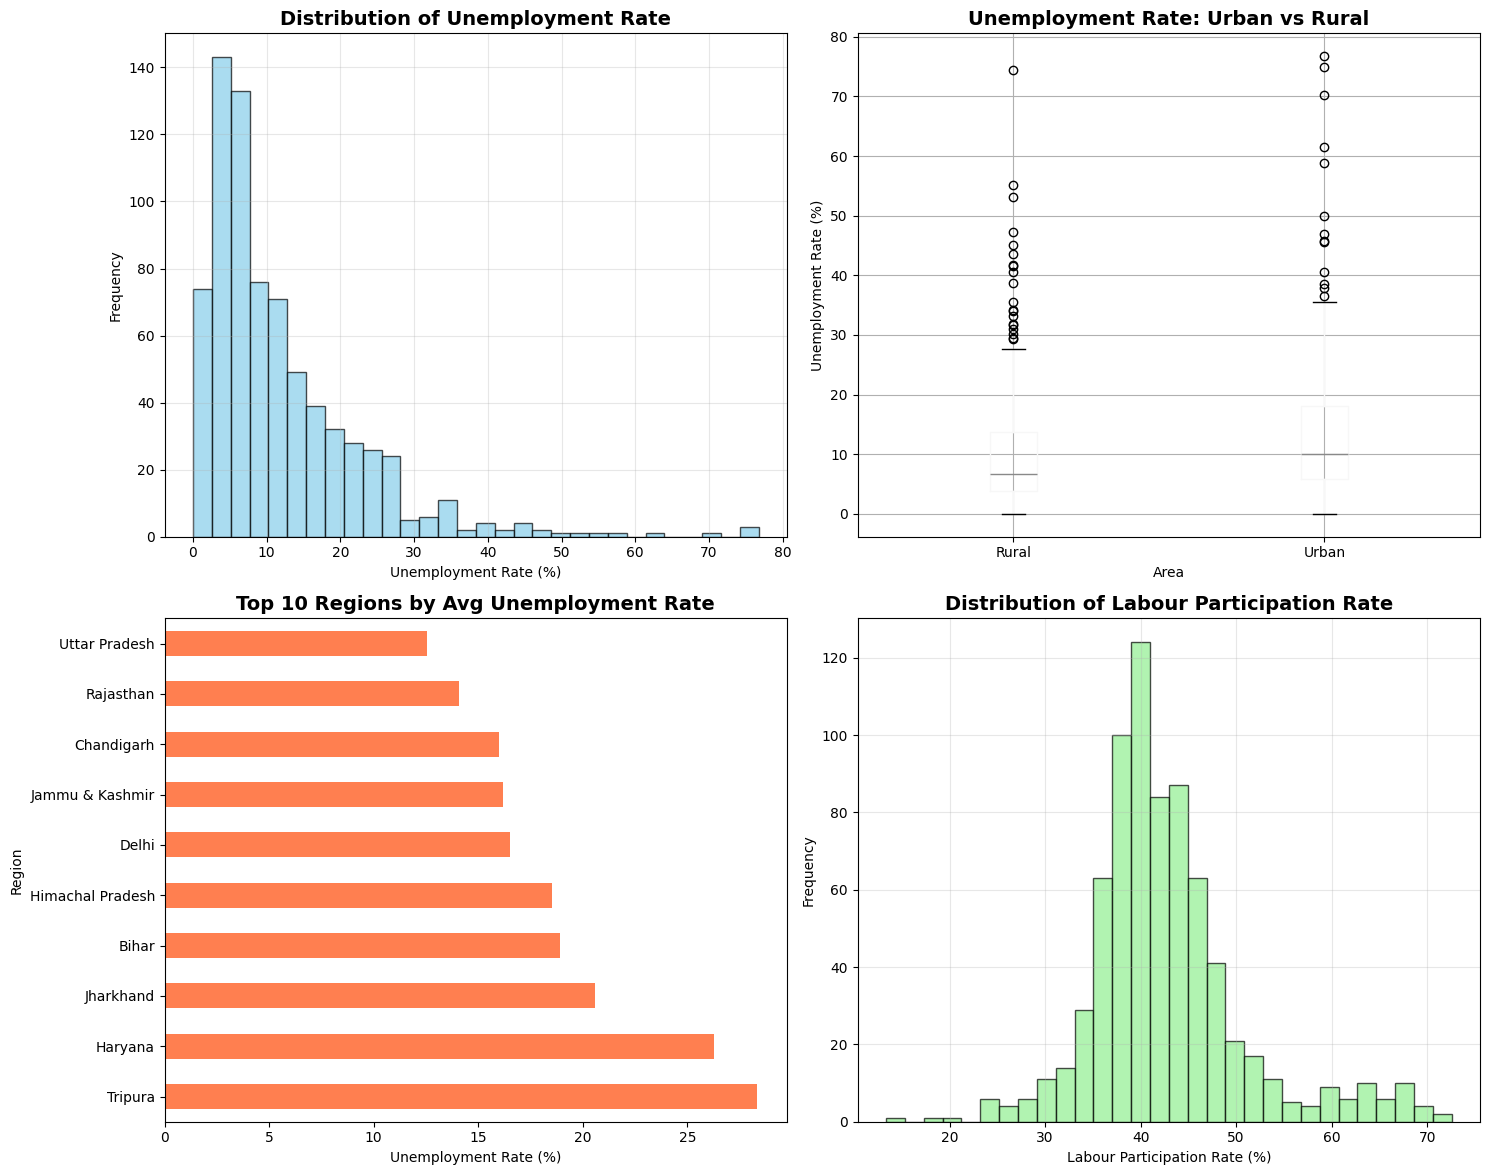

In [15]:
# Create comprehensive visualization dashboard
plt.figure(figsize=(15, 12))

# 1. Overall Unemployment Rate Distribution
plt.subplot(2, 2, 1)
plt.hist(df_clean['Estimated Unemployment Rate (%)'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Unemployment Rate', fontsize=14, fontweight='bold')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# 2. Urban vs Rural Unemployment
plt.subplot(2, 2, 2)
df_clean.boxplot(column='Estimated Unemployment Rate (%)', by='Area', ax=plt.gca())
plt.title('Unemployment Rate: Urban vs Rural', fontsize=14, fontweight='bold')
plt.suptitle('')
plt.ylabel('Unemployment Rate (%)')

# 3. Top 10 States by Unemployment Rate
plt.subplot(2, 2, 3)
top_10_regions = regional_unemployment.head(10)
top_10_regions.plot(kind='barh', color='coral', ax=plt.gca())
plt.title('Top 10 Regions by Avg Unemployment Rate', fontsize=14, fontweight='bold')
plt.xlabel('Unemployment Rate (%)')

# 4. Labour Participation Rate Distribution
plt.subplot(2, 2, 4)
plt.hist(df_clean['Estimated Labour Participation Rate (%)'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Distribution of Labour Participation Rate', fontsize=14, fontweight='bold')
plt.xlabel('Labour Participation Rate (%)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 7.2 Time Series Visualizations

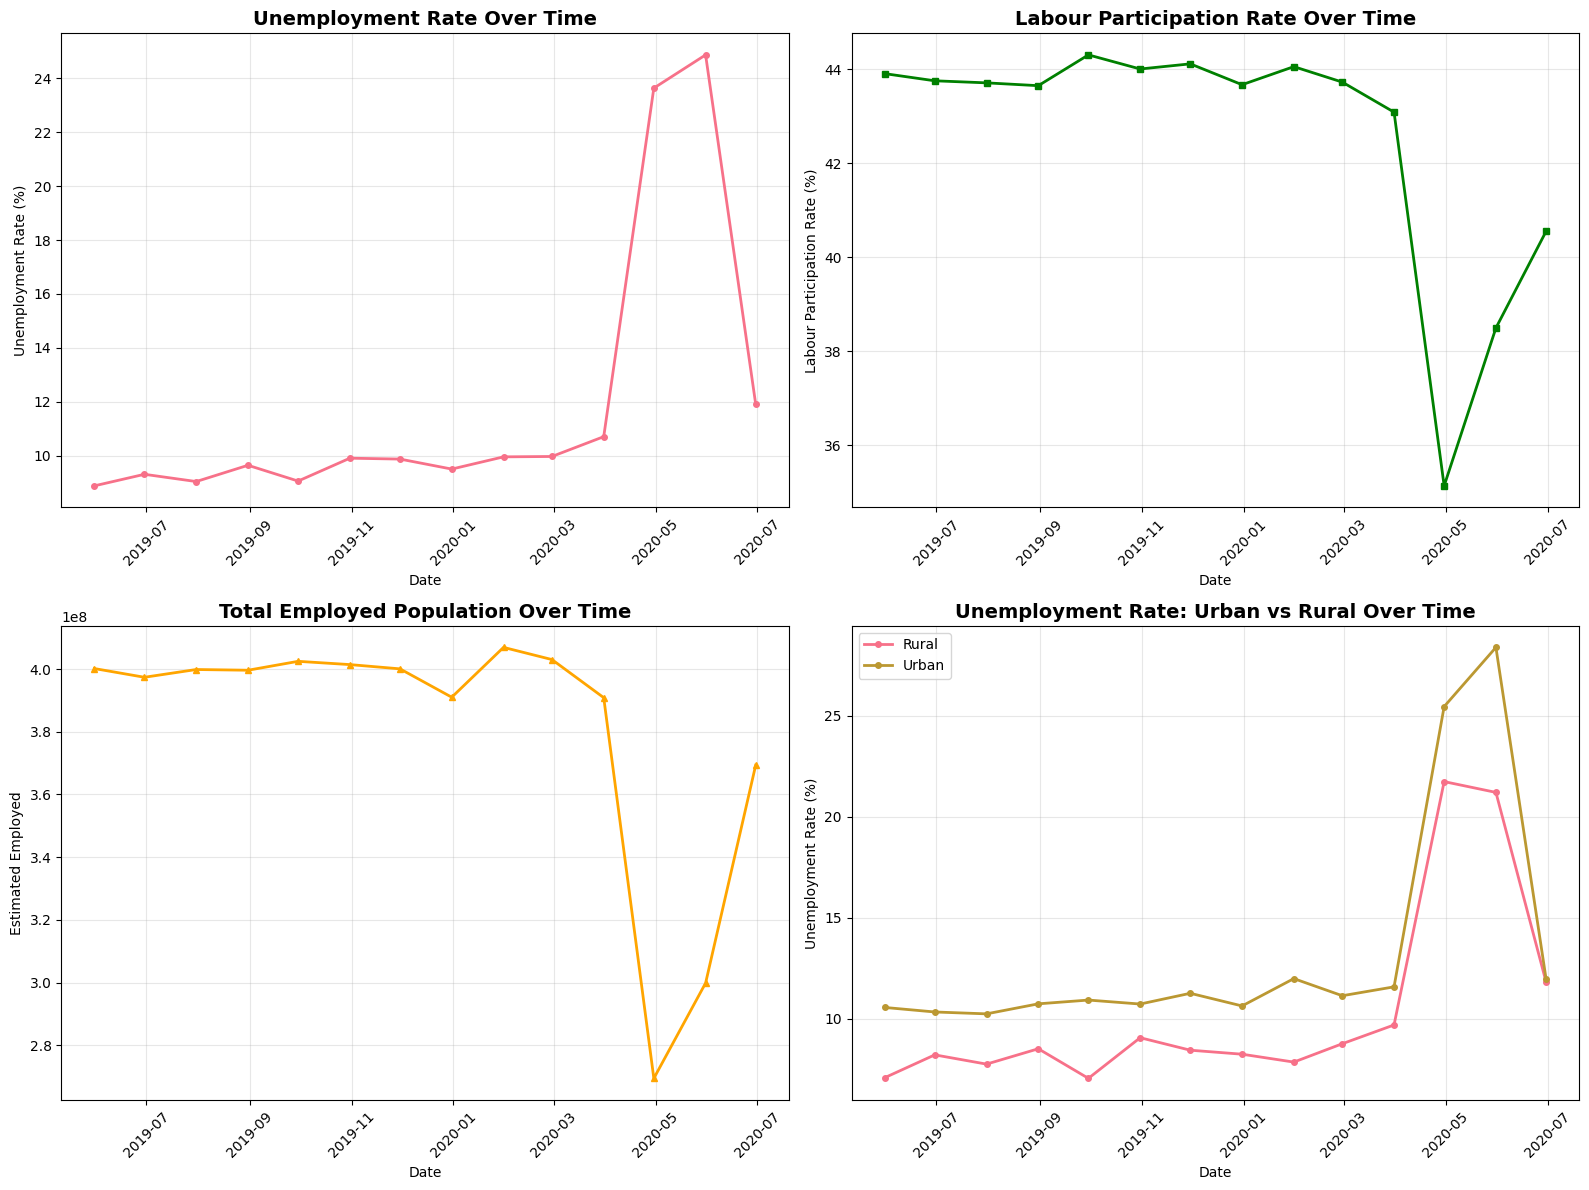

In [16]:
# Time Series Visualization
plt.figure(figsize=(16, 12))

# 1. Unemployment Rate Over Time
plt.subplot(2, 2, 1)
monthly_unemployment = df_clean.groupby('Date')['Estimated Unemployment Rate (%)'].mean()
plt.plot(monthly_unemployment.index, monthly_unemployment.values, marker='o', linewidth=2, markersize=4)
plt.title('Unemployment Rate Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# 2. Labour Participation Rate Over Time
plt.subplot(2, 2, 2)
monthly_participation = df_clean.groupby('Date')['Estimated Labour Participation Rate (%)'].mean()
plt.plot(monthly_participation.index, monthly_participation.values, marker='s', color='green', linewidth=2, markersize=4)
plt.title('Labour Participation Rate Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Labour Participation Rate (%)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# 3. Employment Numbers Over Time
plt.subplot(2, 2, 3)
monthly_employed = df_clean.groupby('Date')['Estimated Employed'].sum()
plt.plot(monthly_employed.index, monthly_employed.values, marker='^', color='orange', linewidth=2, markersize=4)
plt.title('Total Employed Population Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Estimated Employed')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# 4. Urban vs Rural Unemployment Trends
plt.subplot(2, 2, 4)
for area in df_clean['Area'].unique():
    area_data = df_clean[df_clean['Area'] == area]
    area_monthly = area_data.groupby('Date')['Estimated Unemployment Rate (%)'].mean()
    plt.plot(area_monthly.index, area_monthly.values, marker='o', label=area, linewidth=2, markersize=4)
plt.title('Unemployment Rate: Urban vs Rural Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 7.3 Regional Heatmap Analysis

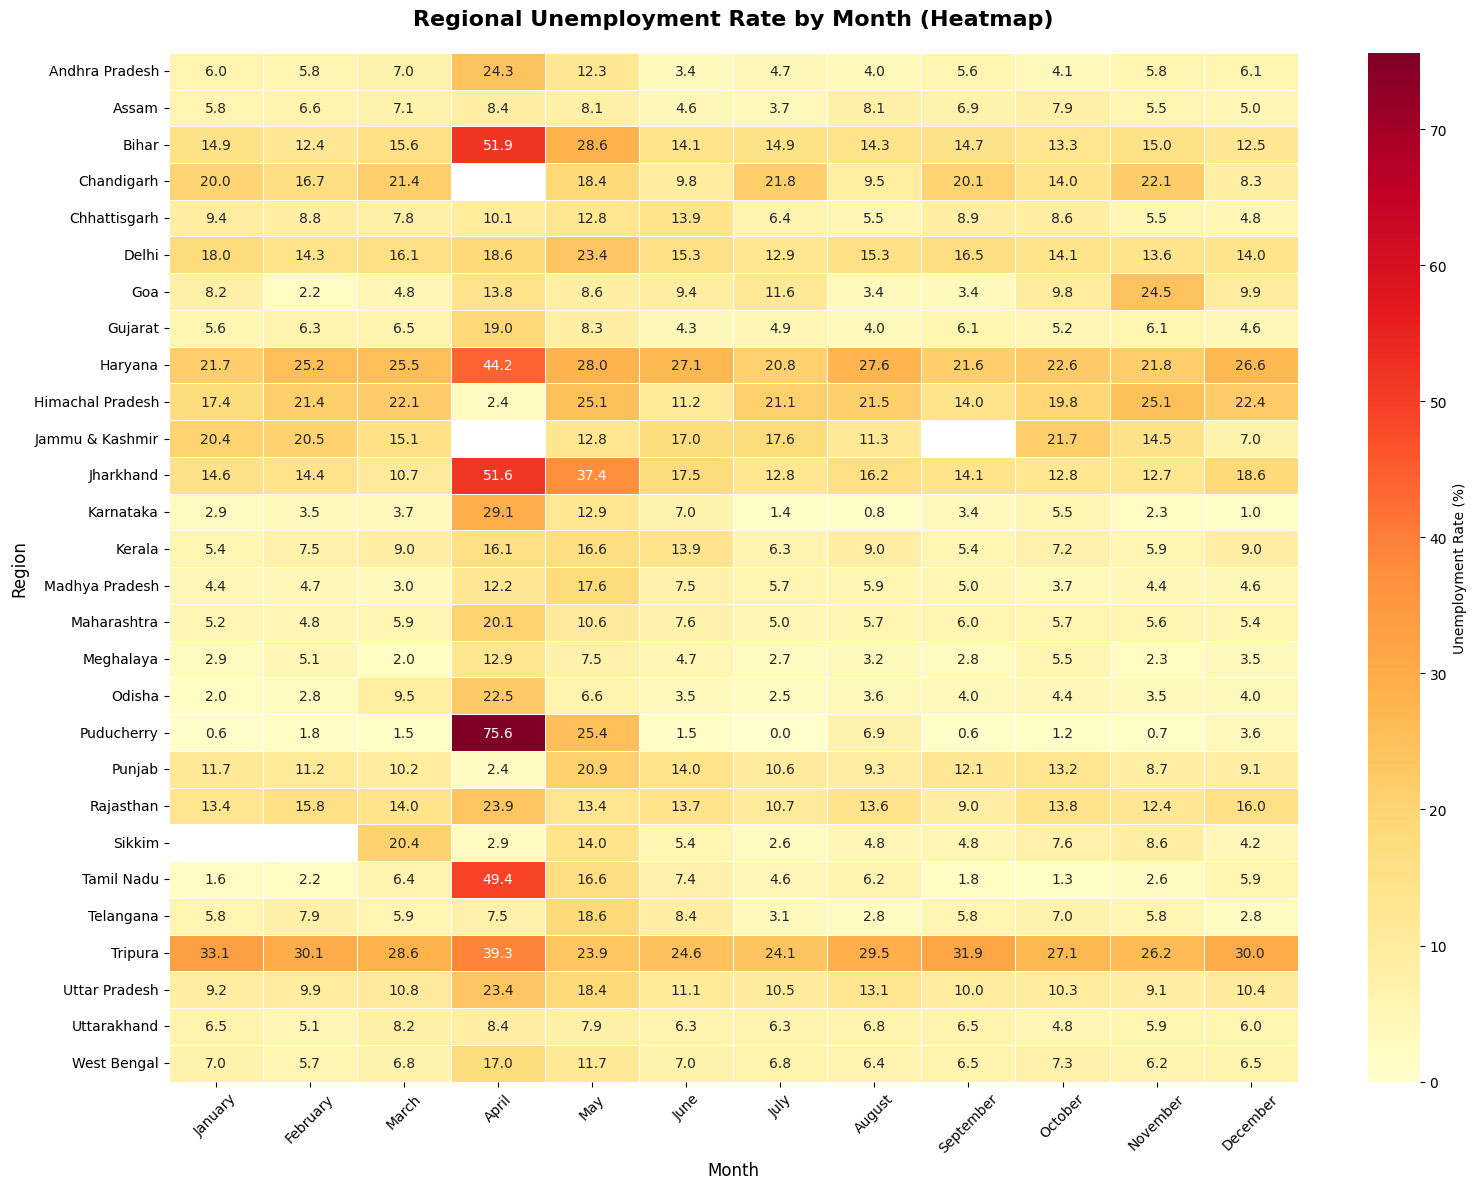

In [17]:
# Regional Heatmap
plt.figure(figsize=(16, 12))

# Create pivot table for heatmap
pivot_data = df_clean.pivot_table(
    values='Estimated Unemployment Rate (%)', 
    index='Region', 
    columns='Month_Name', 
    aggfunc='mean'
)

# Reorder columns by month
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
pivot_data = pivot_data.reindex(columns=[col for col in month_order if col in pivot_data.columns])

sns.heatmap(pivot_data, annot=True, fmt='.1f', cmap='YlOrRd', 
            cbar_kws={'label': 'Unemployment Rate (%)'}, 
            linewidths=0.5)
plt.title('Regional Unemployment Rate by Month (Heatmap)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### 7.4 Correlation Analysis

Correlation Matrix:
                                         Estimated Unemployment Rate (%)  \
Estimated Unemployment Rate (%)                                 1.000000   
Estimated Employed                                             -0.222876   
Estimated Labour Participation Rate (%)                         0.002558   

                                         Estimated Employed  \
Estimated Unemployment Rate (%)                   -0.222876   
Estimated Employed                                 1.000000   
Estimated Labour Participation Rate (%)            0.011300   

                                         Estimated Labour Participation Rate (%)  
Estimated Unemployment Rate (%)                                         0.002558  
Estimated Employed                                                      0.011300  
Estimated Labour Participation Rate (%)                                 1.000000  


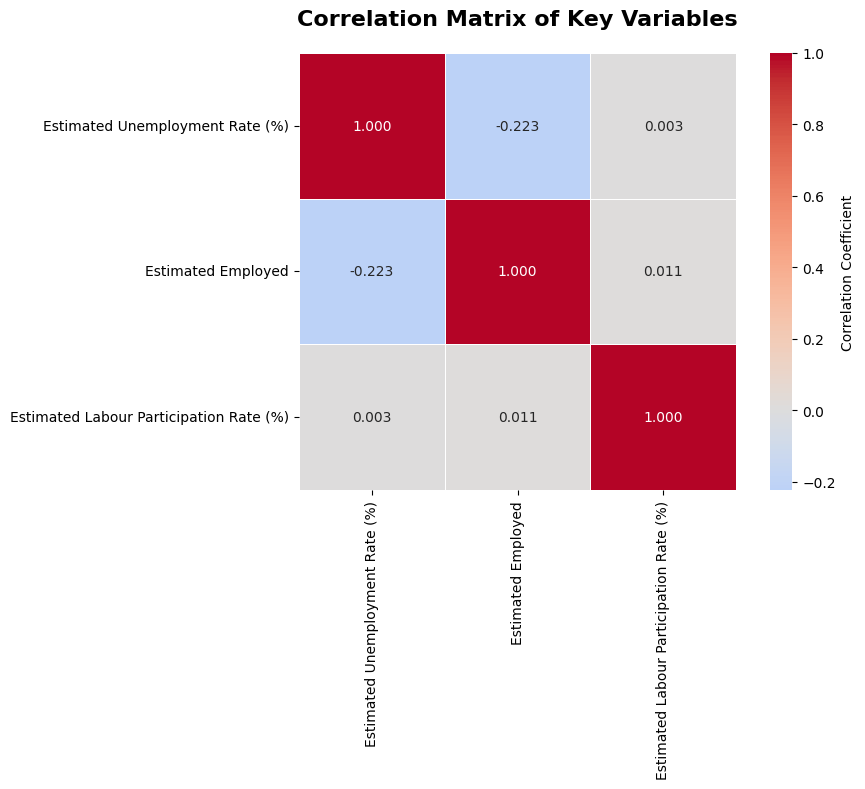

In [18]:
# Correlation Analysis
correlation_data = df_clean[['Estimated Unemployment Rate (%)', 
                           'Estimated Employed', 
                           'Estimated Labour Participation Rate (%)']].corr()

print("Correlation Matrix:")
print(correlation_data)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.3f', linewidths=0.5,
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix of Key Variables', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

## 8. Advanced Analysis

### 8.1 Volatility Analysis

In [19]:
# Find regions with highest volatility
volatility_analysis = df_clean.groupby('Region')['Estimated Unemployment Rate (%)'].agg(['mean', 'std']).reset_index()
volatility_analysis['coefficient_of_variation'] = volatility_analysis['std'] / volatility_analysis['mean']
volatility_analysis = volatility_analysis.sort_values('coefficient_of_variation', ascending=False)

print("Top 10 Most Volatile Regions (by Coefficient of Variation):")
volatility_analysis.head(10)[['Region', 'mean', 'std', 'coefficient_of_variation']]

Top 10 Most Volatile Regions (by Coefficient of Variation):


,Region,mean,std,coefficient_of_variation
18,Puducherry,10.215000,24.106816,2.359943
22,Tamil Nadu,9.284286,14.455317,1.556966
12,Karnataka,6.676071,8.103508,1.213814
23,Telangana,7.737857,8.544484,1.104244
14,Madhya Pradesh,7.406429,7.757720,1.047431
17,Odisha,5.657857,5.553891,0.981624
0,Andhra Pradesh,7.477143,6.852073,0.916403
16,Meghalaya,4.798889,4.102673,0.854921
11,Jharkhand,20.585000,16.674746,0.810044
21,Sikkim,7.249412,5.790275,0.798723


### 8.2 Seasonal Analysis

Seasonal Unemployment Patterns:
Month_Name
January       9.950755
February      9.964717
March        10.700577
April        23.641569
May          16.646190
June         10.553462
July          9.033889
August        9.637925
September     9.051731
October       9.900909
November      9.868364
December      9.497358
Name: Estimated Unemployment Rate (%), dtype: float64


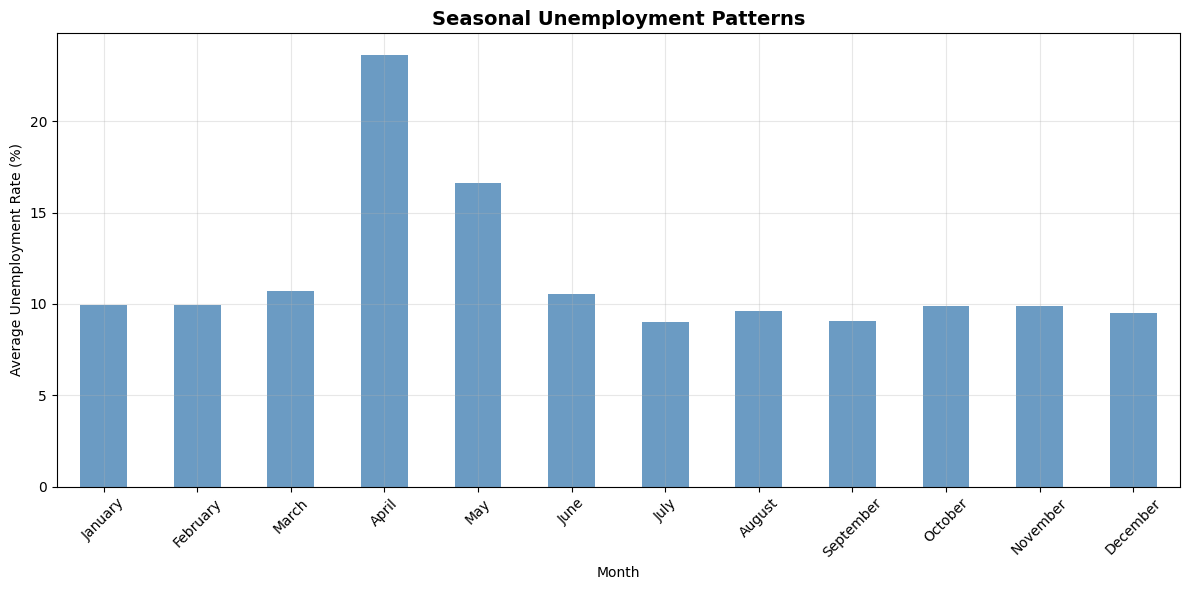

In [20]:
# Seasonal Analysis
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

seasonal_analysis = df_clean.groupby('Month_Name')['Estimated Unemployment Rate (%)'].mean().reindex(month_order)
print("Seasonal Unemployment Patterns:")
print(seasonal_analysis)

# Visualize seasonal patterns
plt.figure(figsize=(12, 6))
seasonal_analysis.plot(kind='bar', color='steelblue', alpha=0.8)
plt.title('Seasonal Unemployment Patterns', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Average Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 8.3 Peak Unemployment Analysis

In [21]:
# Peak unemployment periods
peak_unemployment = df_clean.nlargest(10, 'Estimated Unemployment Rate (%)')
print("Top 10 Highest Unemployment Instances:")
peak_unemployment[['Region', 'Date', 'Area', 'Estimated Unemployment Rate (%)']]

Top 10 Highest Unemployment Instances:


,Region,Date,Area,Estimated Unemployment Rate (%)
627,Puducherry,2020-04-30,Urban,76.74
628,Puducherry,2020-05-31,Urban,75.00
242,Puducherry,2020-04-30,Rural,74.51
531,Jharkhand,2020-05-31,Urban,70.17
530,Jharkhand,2020-04-30,Urban,61.48
412,Bihar,2020-04-30,Urban,58.77
145,Jharkhand,2020-05-31,Rural,55.10
287,Tamil Nadu,2020-04-30,Rural,53.19
507,Himachal Pradesh,2020-05-31,Urban,50.00
38,Bihar,2020-05-31,Rural,47.26


## 9. Summary Statistics by Area and Region

In [22]:
# Summary Statistics by Area and Region
summary_stats = df_clean.groupby(['Area', 'Region']).agg({
    'Estimated Unemployment Rate (%)': ['count', 'mean', 'std', 'min', 'max'],
    'Estimated Labour Participation Rate (%)': 'mean',
    'Estimated Employed': 'mean'
}).round(2)

print("Summary statistics by Area and Region (first 20 rows):")
summary_stats.head(20)

Summary statistics by Area and Region (first 20 rows):


Estimated Unemployment Rate (%)                       \
                                                 count   mean    std    min   
Area  Region                                                                  
Rural Andhra Pradesh                                14   5.53   4.34   0.85   
      Assam                                         12   4.49   2.10   0.00   
      Bihar                                         14  16.77  12.84   8.87   
      Chhattisgarh                                  14   6.63   2.86   0.00   
      Delhi                                         14  15.26   4.09   9.33   
      Goa                                           12   8.39   7.63   0.00   
      Gujarat                                       14   5.92   3.53   1.41   
      Haryana                                       14  25.01   8.54  14.54   
      Himachal Pradesh                              14  15.50   6.91   1.12   
      Jammu & Kashmir                               11  14.95   5.64   2.22   
      Jharkhand                                     14  15.22  14.93   5.01   
      Karnataka                                     14   7.22   9.64   0.37   
      Kerala                                        14  10.34   6.87   4.11   
      Madhya Pradesh                                14   5.65   5.51   1.19   
      Maharashtra                                   14   6.81   6.45   3.03   
      Meghalaya                                     14   2.48   2.13   0.24   
      Odisha                                        14   6.61   6.10   1.81   
      Puducherry                                    12   7.26  21.23   0.00   
      Punjab                                        14  11.92   9.08   3.69   
      Rajasthan                                     14  10.93   3.36   4.03   

                              Estimated Labour Participation Rate (%)  \
                          max                                    mean   
Area  Region                                                            
Rural Andhra Pradesh    16.29                                   42.96   
      Assam              9.38                                   47.07   
      Bihar             47.26                                   38.42   
      Chhattisgarh      10.14                                   42.44   
      Delhi             22.76                                   36.99   
      Goa               23.71                                   38.85   
      Gujarat           14.58                                   50.33   
      Haryana           41.61                                   45.22   
      Himachal Pradesh  25.64                                   41.83   
      Jammu & Kashmir   22.19                                   40.14   
      Jharkhand         55.10                                   40.33   
      Karnataka         33.17                                   42.73   
      Kerala            27.66                                   35.49   
      Madhya Pradesh    22.46                                   39.82   
      Maharashtra       25.28                                   47.39   
      Meghalaya          8.38                                   63.45   
      Odisha            24.48                                   39.38   
      Puducherry        74.51                                   42.52   
      Punjab            40.59                                   43.91   
      Rajasthan         14.66                                   40.59   

                       Estimated Employed  
                                     mean  
Area  Region                               
Rural Andhra Pradesh          11808594.79  
      Assam                    9716617.58  
      Bihar                   21843694.21  
      Chhattisgarh             6501684.43  
      Delhi                     148249.29  
      Goa                       168246.08  
      Gujarat                 13226750.71  
      Haryana                  4649778.07  
      Himachal Pradesh         1897366.07

## 10. Key Findings and Insights

In [23]:
# Generate comprehensive summary
print("=" * 60)
print("COMPREHENSIVE ANALYSIS SUMMARY")
print("=" * 60)

print(f"\n📊 DATASET OVERVIEW:")
print(f"   • Total records analyzed: {len(df_clean):,}")
print(f"   • Date range: {df_clean['Date'].min().strftime('%B %Y')} to {df_clean['Date'].max().strftime('%B %Y')}")
print(f"   • Regions covered: {df_clean['Region'].nunique()}")
print(f"   • Areas: {', '.join(df_clean['Area'].unique())}")

print(f"\n📈 UNEMPLOYMENT STATISTICS:")
print(f"   • National Average: {df_clean['Estimated Unemployment Rate (%)'].mean():.2f}%")
print(f"   • Highest Rate: {df_clean['Estimated Unemployment Rate (%)'].max():.2f}%")
print(f"   • Lowest Rate: {df_clean['Estimated Unemployment Rate (%)'].min():.2f}%")
print(f"   • Standard Deviation: {df_clean['Estimated Unemployment Rate (%)'].std():.2f}%")

urban_avg = df_clean[df_clean['Area'] == 'Urban']['Estimated Unemployment Rate (%)'].mean()
rural_avg = df_clean[df_clean['Area'] == 'Rural']['Estimated Unemployment Rate (%)'].mean()

print(f"\n🏙️ URBAN vs RURAL COMPARISON:")
print(f"   • Urban Average: {urban_avg:.2f}%")
print(f"   • Rural Average: {rural_avg:.2f}%")
print(f"   • Difference: {abs(urban_avg - rural_avg):.2f}% ({'Urban' if urban_avg > rural_avg else 'Rural'} higher)")

print(f"\n👥 LABOUR PARTICIPATION:")
print(f"   • National Average: {df_clean['Estimated Labour Participation Rate (%)'].mean():.2f}%")
print(f"   • Highest Rate: {df_clean['Estimated Labour Participation Rate (%)'].max():.2f}%")
print(f"   • Lowest Rate: {df_clean['Estimated Labour Participation Rate (%)'].min():.2f}%")

highest_unemployment_region = regional_unemployment.index[0]
lowest_unemployment_region = regional_unemployment.index[-1]

print(f"\n🗺️ REGIONAL EXTREMES:")
print(f"   • Highest Unemployment: {highest_unemployment_region} ({regional_unemployment.iloc[0]:.2f}%)")
print(f"   • Lowest Unemployment: {lowest_unemployment_region} ({regional_unemployment.iloc[-1]:.2f}%)")

print(f"\n📊 VOLATILITY ANALYSIS:")
print(f"   • Most Volatile Region: {volatility_analysis.iloc[0]['Region']}")
print(f"   • Coefficient of Variation: {volatility_analysis.iloc[0]['coefficient_of_variation']:.3f}")

# Seasonal insights
highest_month = seasonal_analysis.idxmax()
lowest_month = seasonal_analysis.idxmin()

print(f"\n📅 SEASONAL PATTERNS:")
print(f"   • Highest Unemployment Month: {highest_month} ({seasonal_analysis[highest_month]:.2f}%)")
print(f"   • Lowest Unemployment Month: {lowest_month} ({seasonal_analysis[lowest_month]:.2f}%)")

print(f"\n✅ ANALYSIS COMPLETED SUCCESSFULLY! 🎉")
print("=" * 60)

COMPREHENSIVE ANALYSIS SUMMARY

📊 DATASET OVERVIEW:
   • Total records analyzed: 740
   • Date range: May 2019 to June 2020
   • Regions covered: 28
   • Areas: Rural, Urban

📈 UNEMPLOYMENT STATISTICS:
   • National Average: 11.79%
   • Highest Rate: 76.74%
   • Lowest Rate: 0.00%
   • Standard Deviation: 10.72%

🏙️ URBAN vs RURAL COMPARISON:
   • Urban Average: 13.17%
   • Rural Average: 10.32%
   • Difference: 2.84% (Urban higher)

👥 LABOUR PARTICIPATION:
   • National Average: 42.63%
   • Highest Rate: 72.57%
   • Lowest Rate: 13.33%

🗺️ REGIONAL EXTREMES:
   • Highest Unemployment: Tripura (28.35%)
   • Lowest Unemployment: Meghalaya (4.80%)

📊 VOLATILITY ANALYSIS:
   • Most Volatile Region: Puducherry
   • Coefficient of Variation: 2.360

📅 SEASONAL PATTERNS:
   • Highest Unemployment Month: April (23.64%)
   • Lowest Unemployment Month: July (9.03%)

✅ ANALYSIS COMPLETED SUCCESSFULLY! 🎉
